In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
# 创建时间字符串格式
def date_format(dt):
    t = time.strptime(' '.join(dt), '%d/%m/%Y %H:%M:%S')
    return (t.tm_year,t.tm_mon,t.tm_mday,t.tm_hour,t.tm_min,t.tm_sec)

In [3]:
# 读取数据
path = 'datas/household_power_consumption_1000.txt'
names = ['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df = pd.read_csv(path,sep=';')
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
995,17/12/2006,09:59:00,2.296,0.054,238.13,9.6,0.0,0.0,0.0
996,17/12/2006,10:00:00,2.292,0.054,238.03,9.6,0.0,0.0,0.0
997,17/12/2006,10:01:00,0.370,0.000,240.26,2.4,0.0,0.0,0.0
998,17/12/2006,10:02:00,0.472,0.000,240.15,2.4,0.0,0.0,0.0


In [4]:
df = df.replace('？',np.nan)
df = df.dropna(how='any')
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
995,17/12/2006,09:59:00,2.296,0.054,238.13,9.6,0.0,0.0,0.0
996,17/12/2006,10:00:00,2.292,0.054,238.03,9.6,0.0,0.0,0.0
997,17/12/2006,10:01:00,0.370,0.000,240.26,2.4,0.0,0.0,0.0
998,17/12/2006,10:02:00,0.472,0.000,240.15,2.4,0.0,0.0,0.0


In [5]:
X = df[names[0:2]]
X = X.apply(lambda x: pd.Series(date_format(x)),axis=1)
Y = df[names[4]]
print(X)
print(Y)

        0   1   2   3   4  5
0    2006  12  16  17  24  0
1    2006  12  16  17  25  0
2    2006  12  16  17  26  0
3    2006  12  16  17  27  0
4    2006  12  16  17  28  0
..    ...  ..  ..  ..  .. ..
995  2006  12  17   9  59  0
996  2006  12  17  10   0  0
997  2006  12  17  10   1  0
998  2006  12  17  10   2  0
999  2006  12  17  10   3  0

[1000 rows x 6 columns]
0      234.84
1      233.63
2      233.29
3      233.74
4      235.68
        ...  
995    238.13
996    238.03
997    240.26
998    240.15
999    237.55
Name: Voltage, Length: 1000, dtype: float64


In [6]:
# 划分训练数据集，和测试数据集
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [7]:
# 数据标准化
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [8]:
# 训练模型
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# from sklearn.externals import joblib 产生警告
# import joblib
# # 模型保存
# joblib.dump(ss, 'static/model/data_ss_w.model')
# joblib.dump(lr, 'static/model/data_lr_w.model')
# # 加载模型
# joblib.load('static/model/data_ss_w.model')
# joblib.load('static/model/data_lr_w.model')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# 预测
y_predict = lr.predict(X_test)
print('准确率：',lr.score(X_test,Y_test))

准确率： 0.4850657817514212


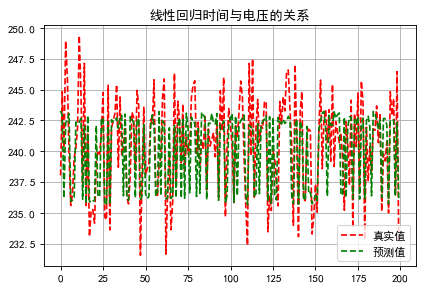

In [11]:
plt.rcParams['font.sans-serif']='SimHei' #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False

t = np.arange(len(X_test))
plt.figure(facecolor='w',dpi=80)
plt.plot(t,Y_test,'r--',label='真实值')
plt.plot(t,y_predict,'g--',label='预测值')
plt.legend(loc = 'lower right')
plt.title('线性回归时间与电压的关系')
plt.grid(b=True)
# plt.savefig('static/images/w.png')
plt.show()

In [15]:
# 时间与电压关系（liner多项式）
from sklearn.pipeline import Pipeline
models = [
    Pipeline([
        ('ploy', PolynomialFeatures()),
        ('linear', LinearRegression())
    ])
]
model = models[0]
# 获取x，y变量，并将时间变量转换为数值连续性
X = datas[names[0:2]]
X = X.apply(pd.Series(date_format),axis=1)
Y = datas[names[4]]

# 对数据集进行划分
X_tarin,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)
# 数据标准化
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
# 模型训练
t = np.arange(len(X_test))
N = 5
d_pool = np.arange(1,N,1)
m = d_plool.seze
clrs = []
for c in np.linspace(16711680,255,m):
    clrs.aapend('#%06'%c)
line_width = 3

plt.figure(figureseize(12,6),facecolor='w')
for i,d in enumerated(d_pool):
    plt.subplot(N-1,1,i+1)
    plt.plot(t,Y_test,'r--',label='真实值')
    model.set_params(Ploy_degree=d) #设置多项式阶数
    model.fit(X_train,Y_train)
    lin = model.get_params('Linear')['Linear']
    output = '%d阶，系数为：'%d
    print(output，lin.coef_.ravel())
y_hat = model.predict(X_test)    
s = model。score

NameError: name 'PolynomialFeatures' is not defined

NameError: name 'PloynomialFeatures' is not defined